# <center>Assignment 9</center>

## <center>RNN (Google Stock)</center>

**Name               :** Atharva Ramgirkar  
**Registration Number:** 19BCE0114  
**Submission Date    :** 18 July, 2021  
**Program            :** VIT-AI Industry Certifiation  
**Email              :** atharva.ramgirkar2019@vitstudent.ac.in  

*Other Assignments can be found in the link:* **https://drive.google.com/drive/folders/1QGOLHyZykoj_CroTJu6-YkZWf32JZ-QH?usp=sharing**

<hr>

## <center>Table of Content</center>
* [Importing Libraries](#1.-Importing-Libraries)  
    * [Initailizing Objects](1.1-Initailizing-Objects)
* [Getting Data for Training](#2.-Getting-Data-for-Training)
    * [Getting Target Variable](#2.1-Getting-Target-Variable)
* [Scaling the Data](#3.-Scaling-the-Data)
* [Making the Training Dataset](#4.-Making-the-Training-Dataset)
* [Reshaping the Data to fit LSTM input](#5.-Reshaping-the-Data-to-fit-LSTM-input)
* [Building the Model](#6.-Building-the-Model)
    * [Adding Hidden Layers](#6.1-Adding-Hidden-Layers)
    * [Adding Output Layer](#6.2-Adding-Output-Layer)
* [Compiling the Model](#7.-Compiling-the-Model)
* [Training the Model](#8.-Training-the-Model)
* [Getting the Test Data](#9.-Getting-the-Test-Data)
    * [Concatinating Test Data to match LSTM requirements](#9.1-Concatinating-Test-Data-to-match-LSTM-requirements)
    * [Reshaping Test Data to Match model Input Format](#9.2-Reshaping-Test-Data-to-Match-model-Input-Format)
* [Predicting Using Trained Model](#10.-Predicting-Using-Trained-Model)
* [Compairing Predictions with Real Values](#11.-Compairing-Predictions-with-Real-Values)


### 1. Importing Libraries

[Back To Top](#Table-of-Content)

In [1]:
import pandas as pd
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For the Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Scaling the Data
from sklearn.preprocessing import MinMaxScaler

#### 1.1 Initializing Objects

In [36]:
# Initializing the MinMaxScalar Object
sc    = MinMaxScaler()

# Initializing the Model
model = Sequential()

### 2. Getting Data for Training

[Back To Top](#Table-of-Content)

In [3]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv",
                       parse_dates=['Date'])

In [4]:
df_train

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"73,80,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"57,49,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"65,90,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"54,05,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"6,23,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"7,89,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"11,53,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"7,44,300"


In [5]:
df_train_Open = df_train[['Date','Open']]

In [6]:
df_train_Open

,Date,Open
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04
...,...,...
1253,2016-12-23,790.90
1254,2016-12-27,790.68
1255,2016-12-28,793.70
1256,2016-12-29,783.33


In [7]:
df_vals = df_train_Open.reset_index()['Open']

#### 2.1 Getting Target Variable

In [8]:
df_vals

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [9]:
df_vals.shape

(1258,)

### 3. Scaling the Data

[Back To Top](#Table-of-Content)

In [10]:
df_vals=sc.fit_transform(np.array(df_vals).reshape(-1,1))

In [11]:
df_vals

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
df_vals.shape[0]-60

1198

### 4. Making the Training Dataset

[Back To Top](#Table-of-Content)

In [25]:
X, y = [],[]

In [26]:
for i in range(len(df_vals)-60):
        a = df_vals[i:(i+60), 0]
        X.append(a)
        y.append(df_vals[i + 60, 0])

In [27]:
X_train = np.array(X)

In [28]:
X_train.shape

(1198, 60)

In [29]:
y_train  = np.array(y)
y_train.shape

(1198,)

### 5. Reshaping the Data to fit LSTM input

[Back To Top](#Table-of-Content)

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

In [31]:
X_train.shape

(1198, 60, 1)

### 6. Building the Model

[Back To Top](#Table-of-Content)

#### 6.1 Adding Hidden Layers

In [37]:
model.add(LSTM(60,return_sequences=True,input_shape=(60,1)))


model.add(LSTM(60,return_sequences=True))


model.add(LSTM(30))

#### 6.2 Adding Output Layer

In [38]:
model.add(Dense(1))

### 7. Compiling the Model

[Back To Top](#Table-of-Content)

In [39]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

### 8. Training the Model

[Back To Top](#Table-of-Content)

In [40]:
model.fit(X_train,
          y_train,
          epochs=5,
          batch_size=10)

Epoch 1/5
120/120 [==============================] - 11s 91ms/step - loss: 0.0110
Epoch 2/5
120/120 [==============================] - 11s 92ms/step - loss: 0.0017
Epoch 3/5
120/120 [==============================] - 12s 98ms/step - loss: 0.0017
Epoch 4/5
120/120 [==============================] - 11s 94ms/step - loss: 0.0014
Epoch 5/5
120/120 [==============================] - 10s 84ms/step - loss: 0.0013


### 9. Getting the Test Data

[Back To Top](#Table-of-Content)

In [41]:
df_test = pd.read_csv("Google_Stock_Price_Test.csv",parse_dates=['Date'])

In [42]:
df_test

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
5,2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
6,2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
7,2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
8,2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
9,2017-01-17,807.08,807.14,800.37,804.61,"1,362,100"


#### 9.1 Concatinating Test Data to match LSTM requirements

In [43]:
df_test = pd.concat([df_train[1208:],
                     df_test],
                    axis=0).reset_index(drop=True)

In [44]:
df_test.shape

(70, 6)

In [45]:
df_vals = df_test.reset_index()['Open']

#### 9.2 Reshaping Test Data to Match model Input Format

In [46]:
df_vals=sc.fit_transform(np.array(df_vals).reshape(-1,1))

In [47]:
X, y = [],[]
for i in range(len(df_vals)-60):
        a = df_vals[i:(i+60), 0]
        X.append(a)
        y.append(df_vals[i + 60, 0])

In [48]:
X_test = np.array(X)

In [49]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### 10. Predicting Using Trained Model

[Back To Top](#Table-of-Content)

In [50]:
preds = model.predict(X_test)

In [51]:
preds=list(sc.inverse_transform(preds).reshape(1,-1)[0])

In [52]:
real = list(df_test['Open'][60:])

### 11. Compairing Predictions with Real Values

[Back To Top](#Table-of-Content)

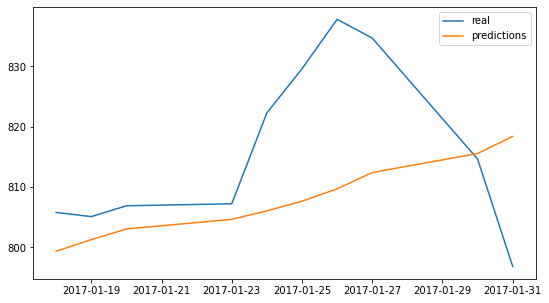

In [59]:
plt.figure(figsize=(9,5))
plt.plot(df_test.iloc[60:,0],real,label='real')
plt.plot(df_test.iloc[60:,0],preds,label='predictions')
plt.legend()

<hr>